# Part 1 - Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df.shape

(10000, 11)

In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


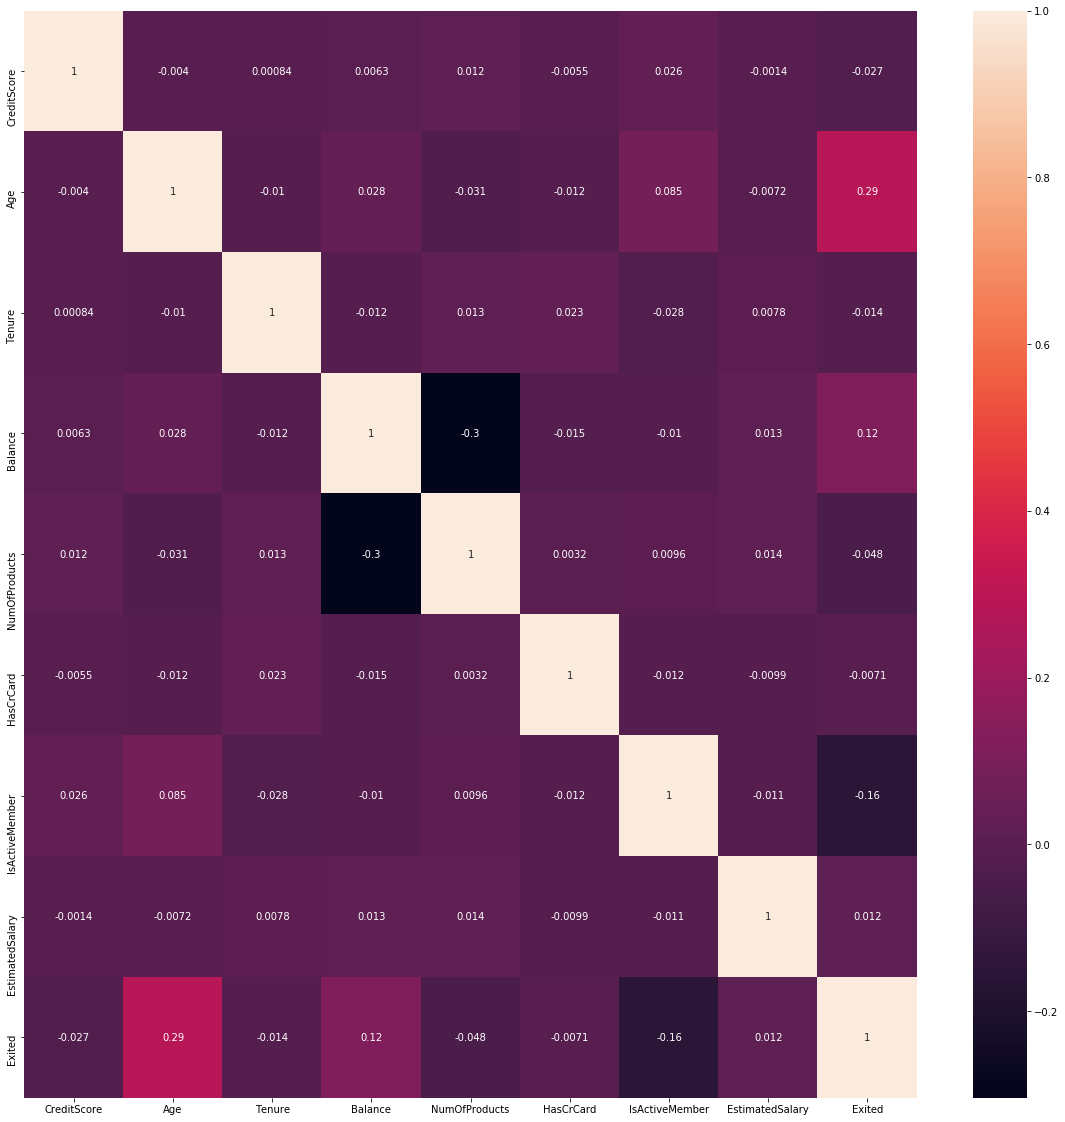

In [8]:
cor=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)
plt.show()

In [9]:
X = df.iloc[:,:10]
y = df.iloc[:, 10]

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
# convert categorical feature into dummy variables

states=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [12]:
#concatenate the remaining dummies columns
X=pd.concat([X,states,gender],axis=1)

#drop the columns as it is no longer required

X=X.drop(['Geography','Gender'],axis=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Working with ANN

In [18]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [20]:
from keras.activations import sigmoid,relu

In [21]:
# Initialising the ANN
Classifier=Sequential()

In [22]:
#adding the input layer and first hidden layer
Classifier.add(Dense(activation='relu',input_dim=11,units=6,kernel_initializer='he_uniform'))

In [23]:
#Adding second hidden layer
Classifier.add(Dense(activation='relu',units=6,kernel_initializer='he_uniform'))

In [26]:
#Adding the output layer
Classifier.add(Dense(activation='sigmoid',units=1,kernel_initializer='uniform'))

In [28]:
# Compiling the ANN
Classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [30]:
# Fitting the ANN to the Training set
Classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\anudeep\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
8000/8000 [==============================] - 2s 198us/step - loss: 0.5194 - accuracy: 0.7944
Epoch 2/100
8000/8000 [==============================] - 1s 149us/step - loss: 0.4510 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 136us/step - loss: 0.4374 - accuracy: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 141us/step - loss: 0.4279 - accuracy: 0.8060
Epoch 5/100
8000/8000 [==============================] - 1s 150us/step - loss: 0.4208 - accuracy: 0.8236
Epoch 6/100
8000/8000 [==============================] - 1s 167us/step - loss: 0.4152 - accuracy: 0.8285
Epoch 7/100
8000/8000 [==============================] - 1s 132us/step - loss: 0.4113 - accuracy: 0.8307
Epoch 8/100
8000/8000 [==============================] - 1s 134us/step - loss: 0.4090 - accuracy: 0.8309
Epoch 9/100
8000/8000 [==============================] - 1s 134us/step - loss: 0.4068 - accuracy: 0.8334
Epoch 10/100
8000/8000 [==============================]

Epoch 78/100
8000/8000 [==============================] - 1s 186us/step - loss: 0.3875 - accuracy: 0.8424
Epoch 79/100
8000/8000 [==============================] - 1s 155us/step - loss: 0.3873 - accuracy: 0.8441
Epoch 80/100
8000/8000 [==============================] - 1s 165us/step - loss: 0.3872 - accuracy: 0.8445
Epoch 81/100
8000/8000 [==============================] - 1s 137us/step - loss: 0.3870 - accuracy: 0.8439
Epoch 82/100
8000/8000 [==============================] - 2s 221us/step - loss: 0.3871 - accuracy: 0.8428
Epoch 83/100
8000/8000 [==============================] - 1s 146us/step - loss: 0.3868 - accuracy: 0.8438
Epoch 84/100
8000/8000 [==============================] - 1s 147us/step - loss: 0.3867 - accuracy: 0.8432
Epoch 85/100
8000/8000 [==============================] - 1s 150us/step - loss: 0.3866 - accuracy: 0.8443
Epoch 86/100
8000/8000 [==============================] - 2s 221us/step - loss: 0.3867 - accuracy: 0.8435
Epoch 87/100
8000/8000 [======================

# Part 3 - Making the predictions and evaluating the model

In [34]:
# Predicting the Test set results
y_pred = Classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)

In [40]:
print(cm)

[[1523   72]
 [ 242  163]]


In [39]:
print(accuracy)

0.843
